In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('country_table.csv')
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


In [19]:
df=df.set_index('Countries')
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


# heatmap() for cor & دیتاهای محدود

<Axes: ylabel='Countries'>

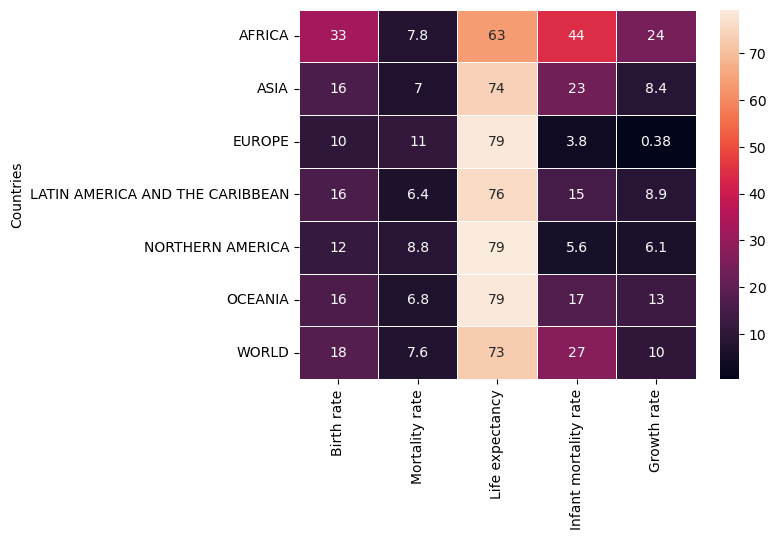

In [26]:
sns.heatmap(df , linewidths=0.5 , annot=True )

<Axes: ylabel='Countries'>

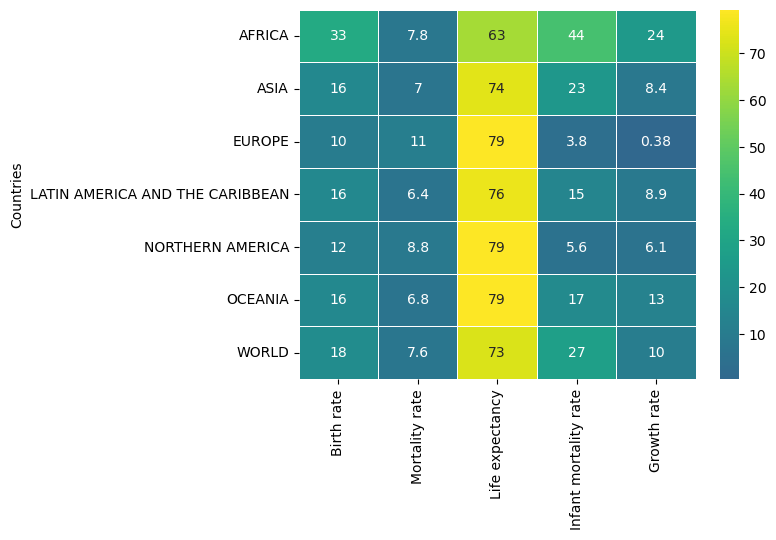

In [30]:
sns.heatmap(df , linewidths=0.5 , annot=True , cmap='viridis' , center=20)

# heatmap for corolation coefitiont

In [37]:
cor=df.corr()

<Axes: >

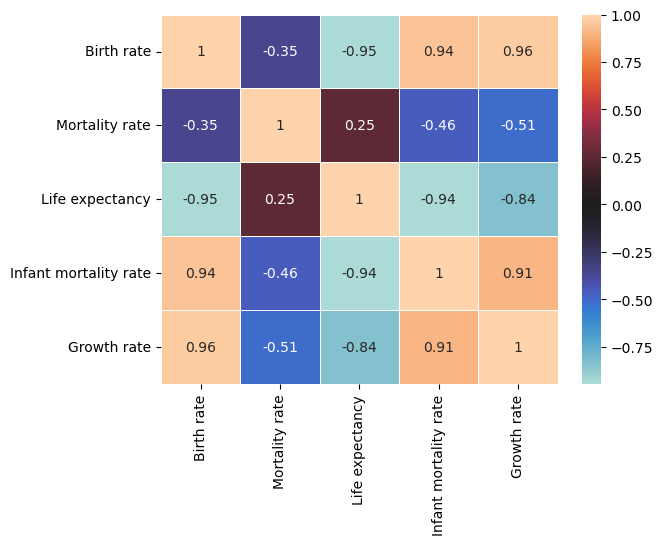

In [43]:
sns.heatmap(cor , annot=True , linewidths=0.5 , center=0)

# clustermap()

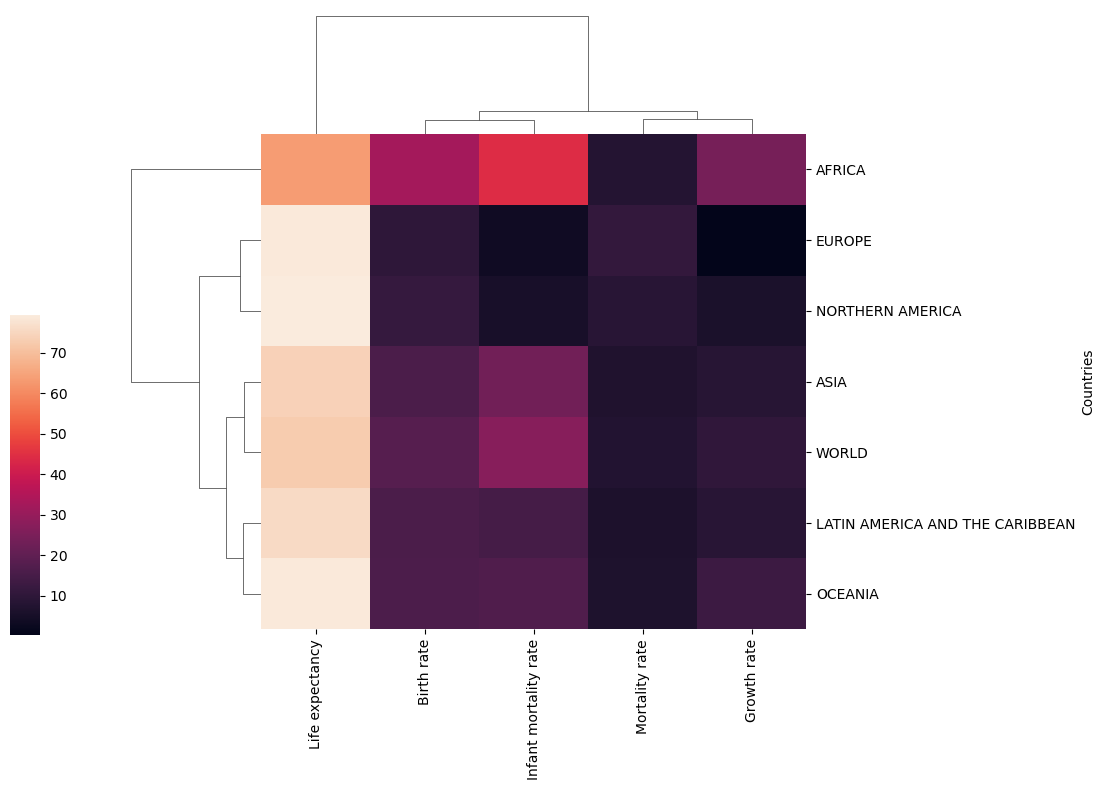

In [58]:
sns.clustermap(df , figsize=(10,8) , cbar_pos=(-0.1 , 0.2 , 0.03, 0.4))

# exercises

In [43]:
df=pd.read_csv('application_record.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [16]:
import warnings
warnings.simplefilter('ignore')

<Axes: xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

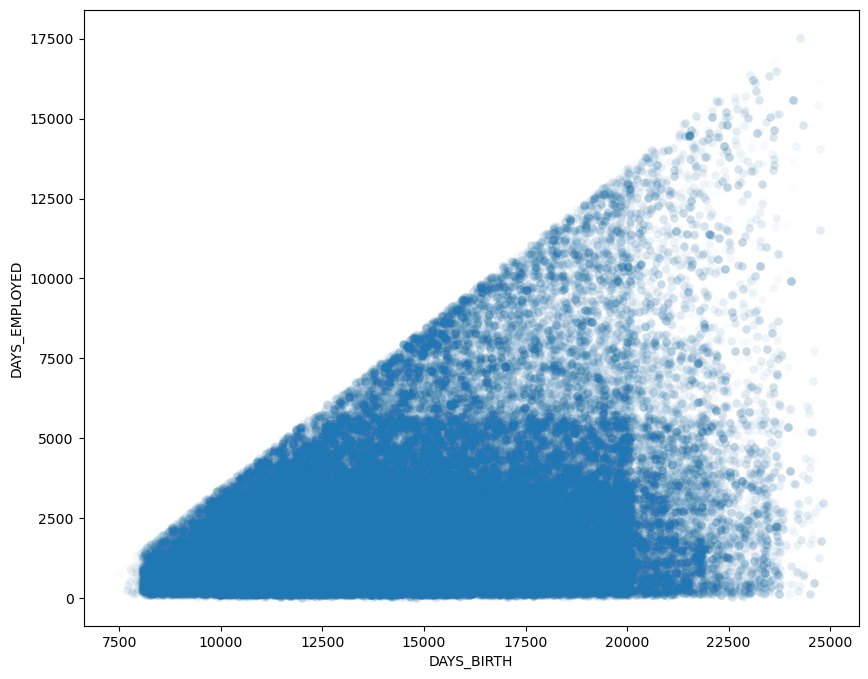

In [28]:
plt.figure(figsize=(10,8))
employed=df[df['DAYS_EMPLOYED']<0]
employed['DAYS_EMPLOYED']=-1*employed['DAYS_EMPLOYED']
employed['DAYS_BIRTH']=-1*employed['DAYS_BIRTH']
sns.scatterplot(data=employed , x='DAYS_BIRTH' , y='DAYS_EMPLOYED', alpha=0.02 , lw=0)

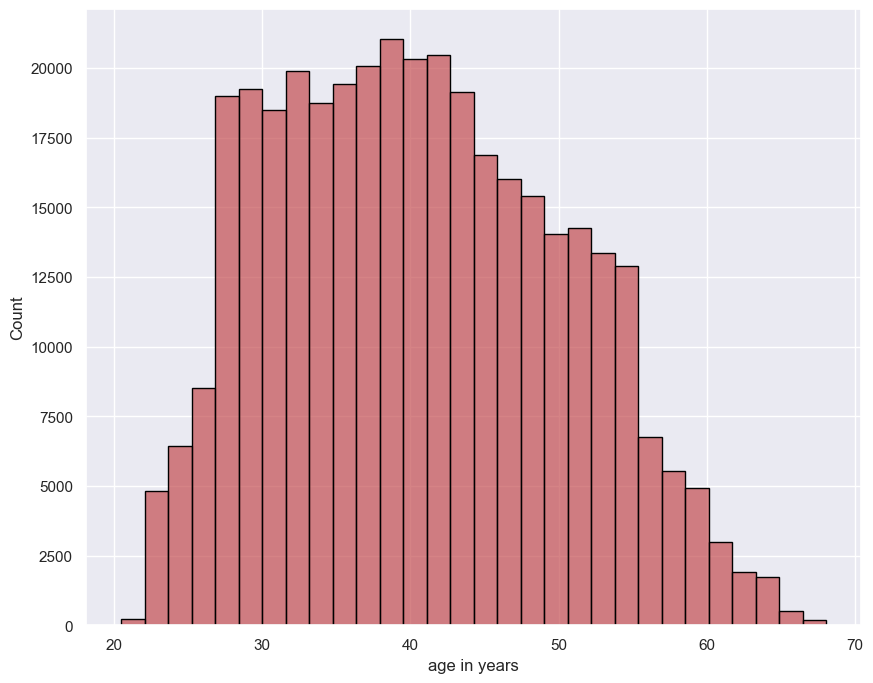

In [47]:
employed['ages']=employed['DAYS_BIRTH']/365
plt.figure(figsize=(10,8))
sns.histplot(data=employed , x='ages', bins=30 , alpha=0.7 , edgecolor='black', color='r' )
plt.xlabel('age in years')
sns.set()

In [93]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

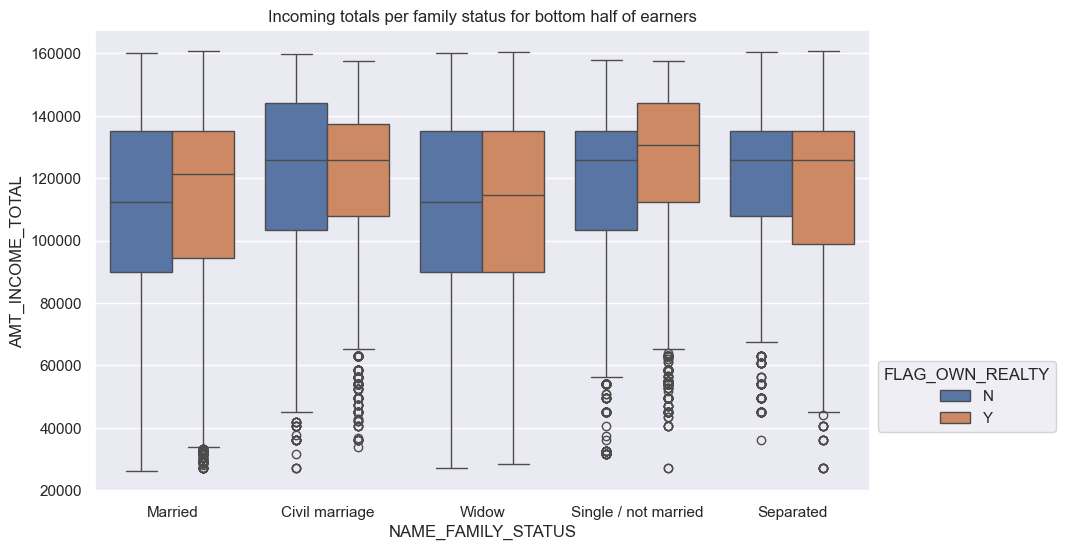

In [47]:
plt.figure(figsize=(10,6))
bottom_half_incoming=df.nsmallest(n=int(0.5 * len(df)),columns=['AMT_INCOME_TOTAL'])
sns.boxplot(data=bottom_half_incoming , x='NAME_FAMILY_STATUS' , y='AMT_INCOME_TOTAL' , hue='FLAG_OWN_REALTY')
plt.legend(bbox_to_anchor=(1,0.3), title='FLAG_OWN_REALTY')
plt.title('Incoming totals per family status for bottom half of earners')
sns.set()

<Axes: >

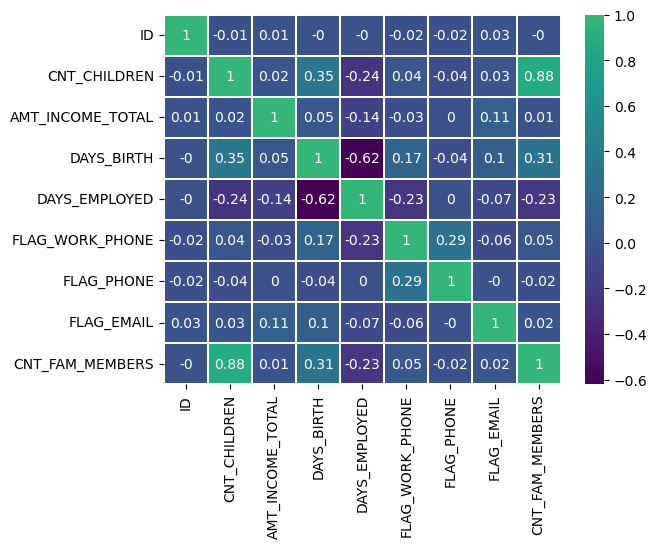

In [37]:
df=df.drop(['FLAG_MOBIL'] , axis=1)
cor=np.round(df.corr(numeric_only=True),2)
sns.heatmap(cor , lw=0.2 , cmap='viridis' , annot=True , center=0.6)